# Regresión lógística binomial

Binomiales: Falso o Verdadero, 1 o 0 esta es su especialidad 

Multinomial: cuando hay mas de 2 posibles clasificaciones

requisitos antes de aplicar el modelo 

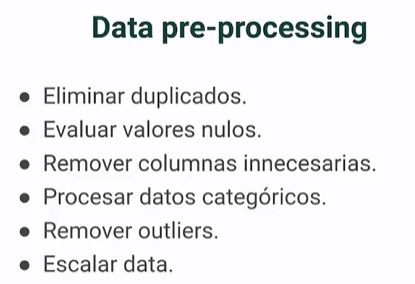

## Carga de datos

In [257]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [258]:
df_data = pd.read_csv('/home/roy/regresion_logistica/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

churn es cuando dejas un servicio

In [259]:
df_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [260]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cambiar total_charges a numeric

In [261]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges,errors='coerce') 

## Manejo de datos nulos

In [262]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [263]:
df_data['TotalCharges']= df_data.TotalCharges.interpolate(method='linear')
# La interpolación es un método para estimar valores desconocidos a partir de valores conocidos cercanos. En este caso,
# se utiliza la interpolación lineal para estimar los valores faltantes en la columna 'TotalCharges'.

## Eliminar id

In [264]:
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [265]:
df_data.drop('customerID',axis=1,inplace=True) # quito la variable customerID que no sirve

## Convertir a numérico variable objetivo

In [266]:
df_data.Churn = df_data.Churn.replace(["Yes", "No"], [1, 0])

In [267]:
df_data_processing = df_data.copy()
df_data_processing

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## Manejo de variables categóricas

In [268]:
df_data_processing = pd.get_dummies(df_data_processing,dtype=int)
df_data_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Analisis de correlación

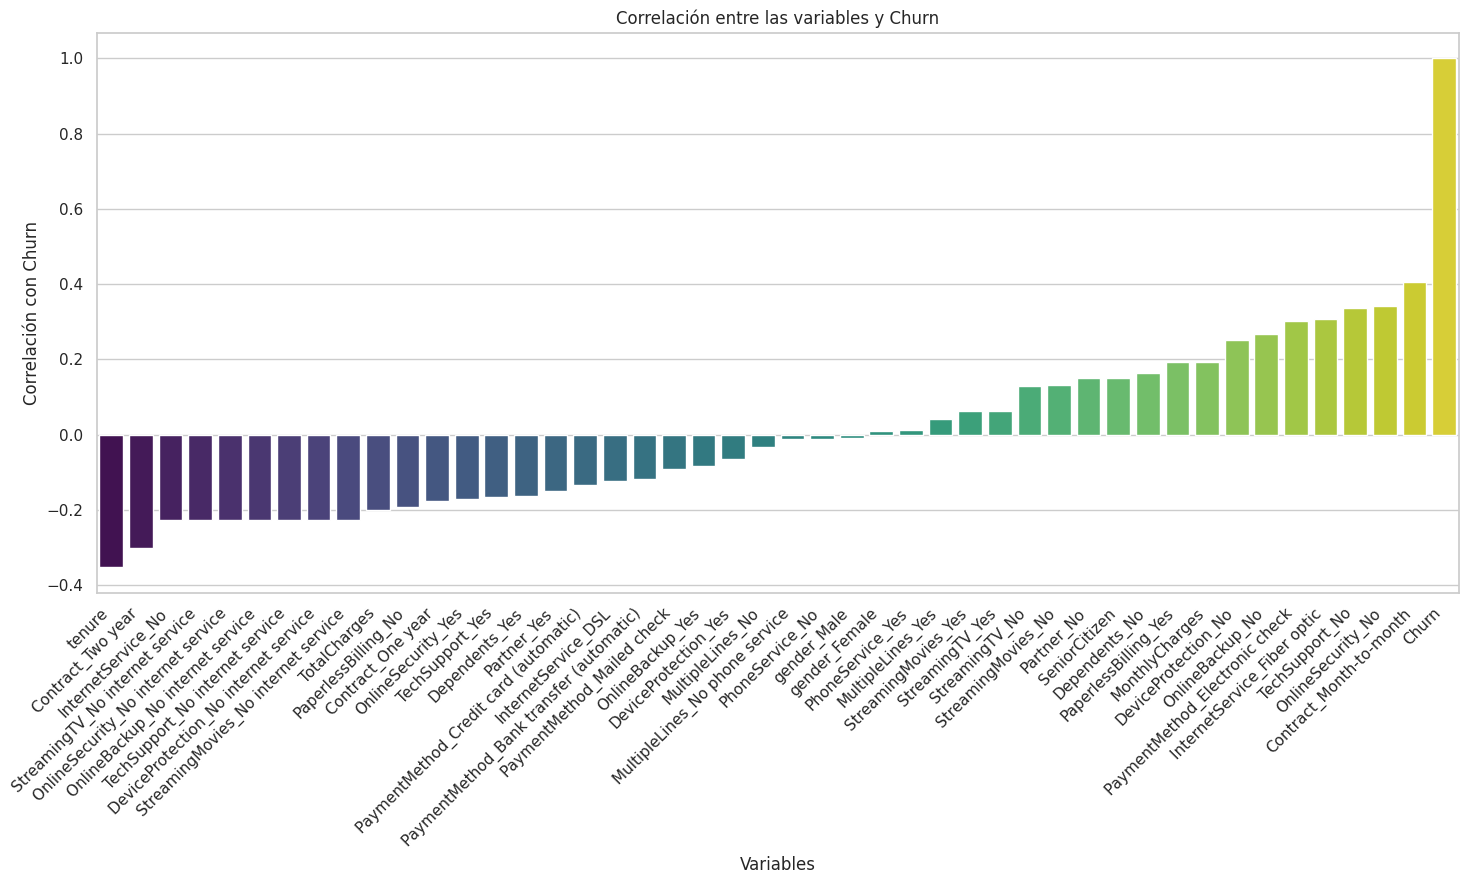

In [269]:
# Calculamos la matriz de correlación no hacemos heat map por ser muchas variables
corr_matrix = df_data_processing.corr()

# Ordenamos la correlación respecto a la columna 'Churn' en orden ascendente
sorted_corr_churn = corr_matrix['Churn'].sort_values()

# Configuramos el estilo de Seaborn (opcional, solo para mejorar la estética)
sns.set(style="whitegrid")

# Creamos la gráfica de barras utilizando Seaborn
plt.figure(figsize=(15, 9))  # Aumentamos el tamaño de la figura
ax = sns.barplot(x=sorted_corr_churn.index, y=sorted_corr_churn.values, palette="viridis")

# Añadimos etiquetas y títulos
plt.xlabel('Variables')
plt.ylabel('Correlación con Churn')
plt.title('Correlación entre las variables y Churn')

# Rotamos las etiquetas del eje x para que se lean mejor
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostramos la gráfica
plt.tight_layout()  # Para asegurarnos de que todo se muestre correctamente
plt.show()

## Escalabilidad de los datos

In [270]:
from sklearn.preprocessing import MinMaxScaler

In [271]:
scaler = MinMaxScaler() # funcion 
df_data_processing_scaled = scaler.fit_transform(df_data_processing) # transformacion pero en array


In [272]:

df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled) # convirtiendo en dataframe
df_data_processing_scaled.columns=df_data_processing.columns# estableciendo los nombres de las variables que se borraron
df_data_processing_scaled # listo 

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.227521,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847461,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.037809,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.033210,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Análisis exploratorio de datos

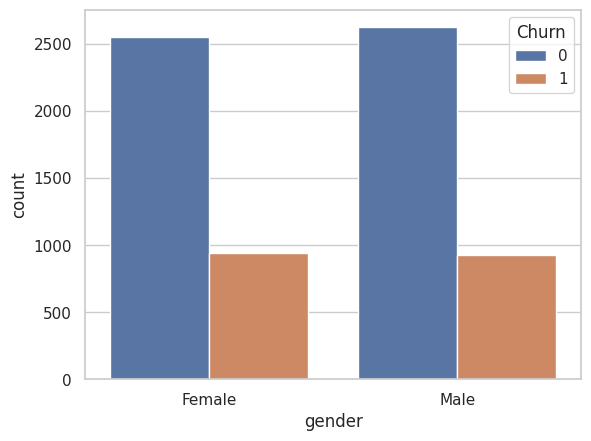

In [273]:
sns.countplot(data= df_data,x= 'gender',hue='Churn') # es mejor hacer el analisis con la data no procesada
plt.show()
# casi la misma cantidad no importa el genero en hacer churn 

In [274]:
colum_cat = df_data.select_dtypes(include='object').columns

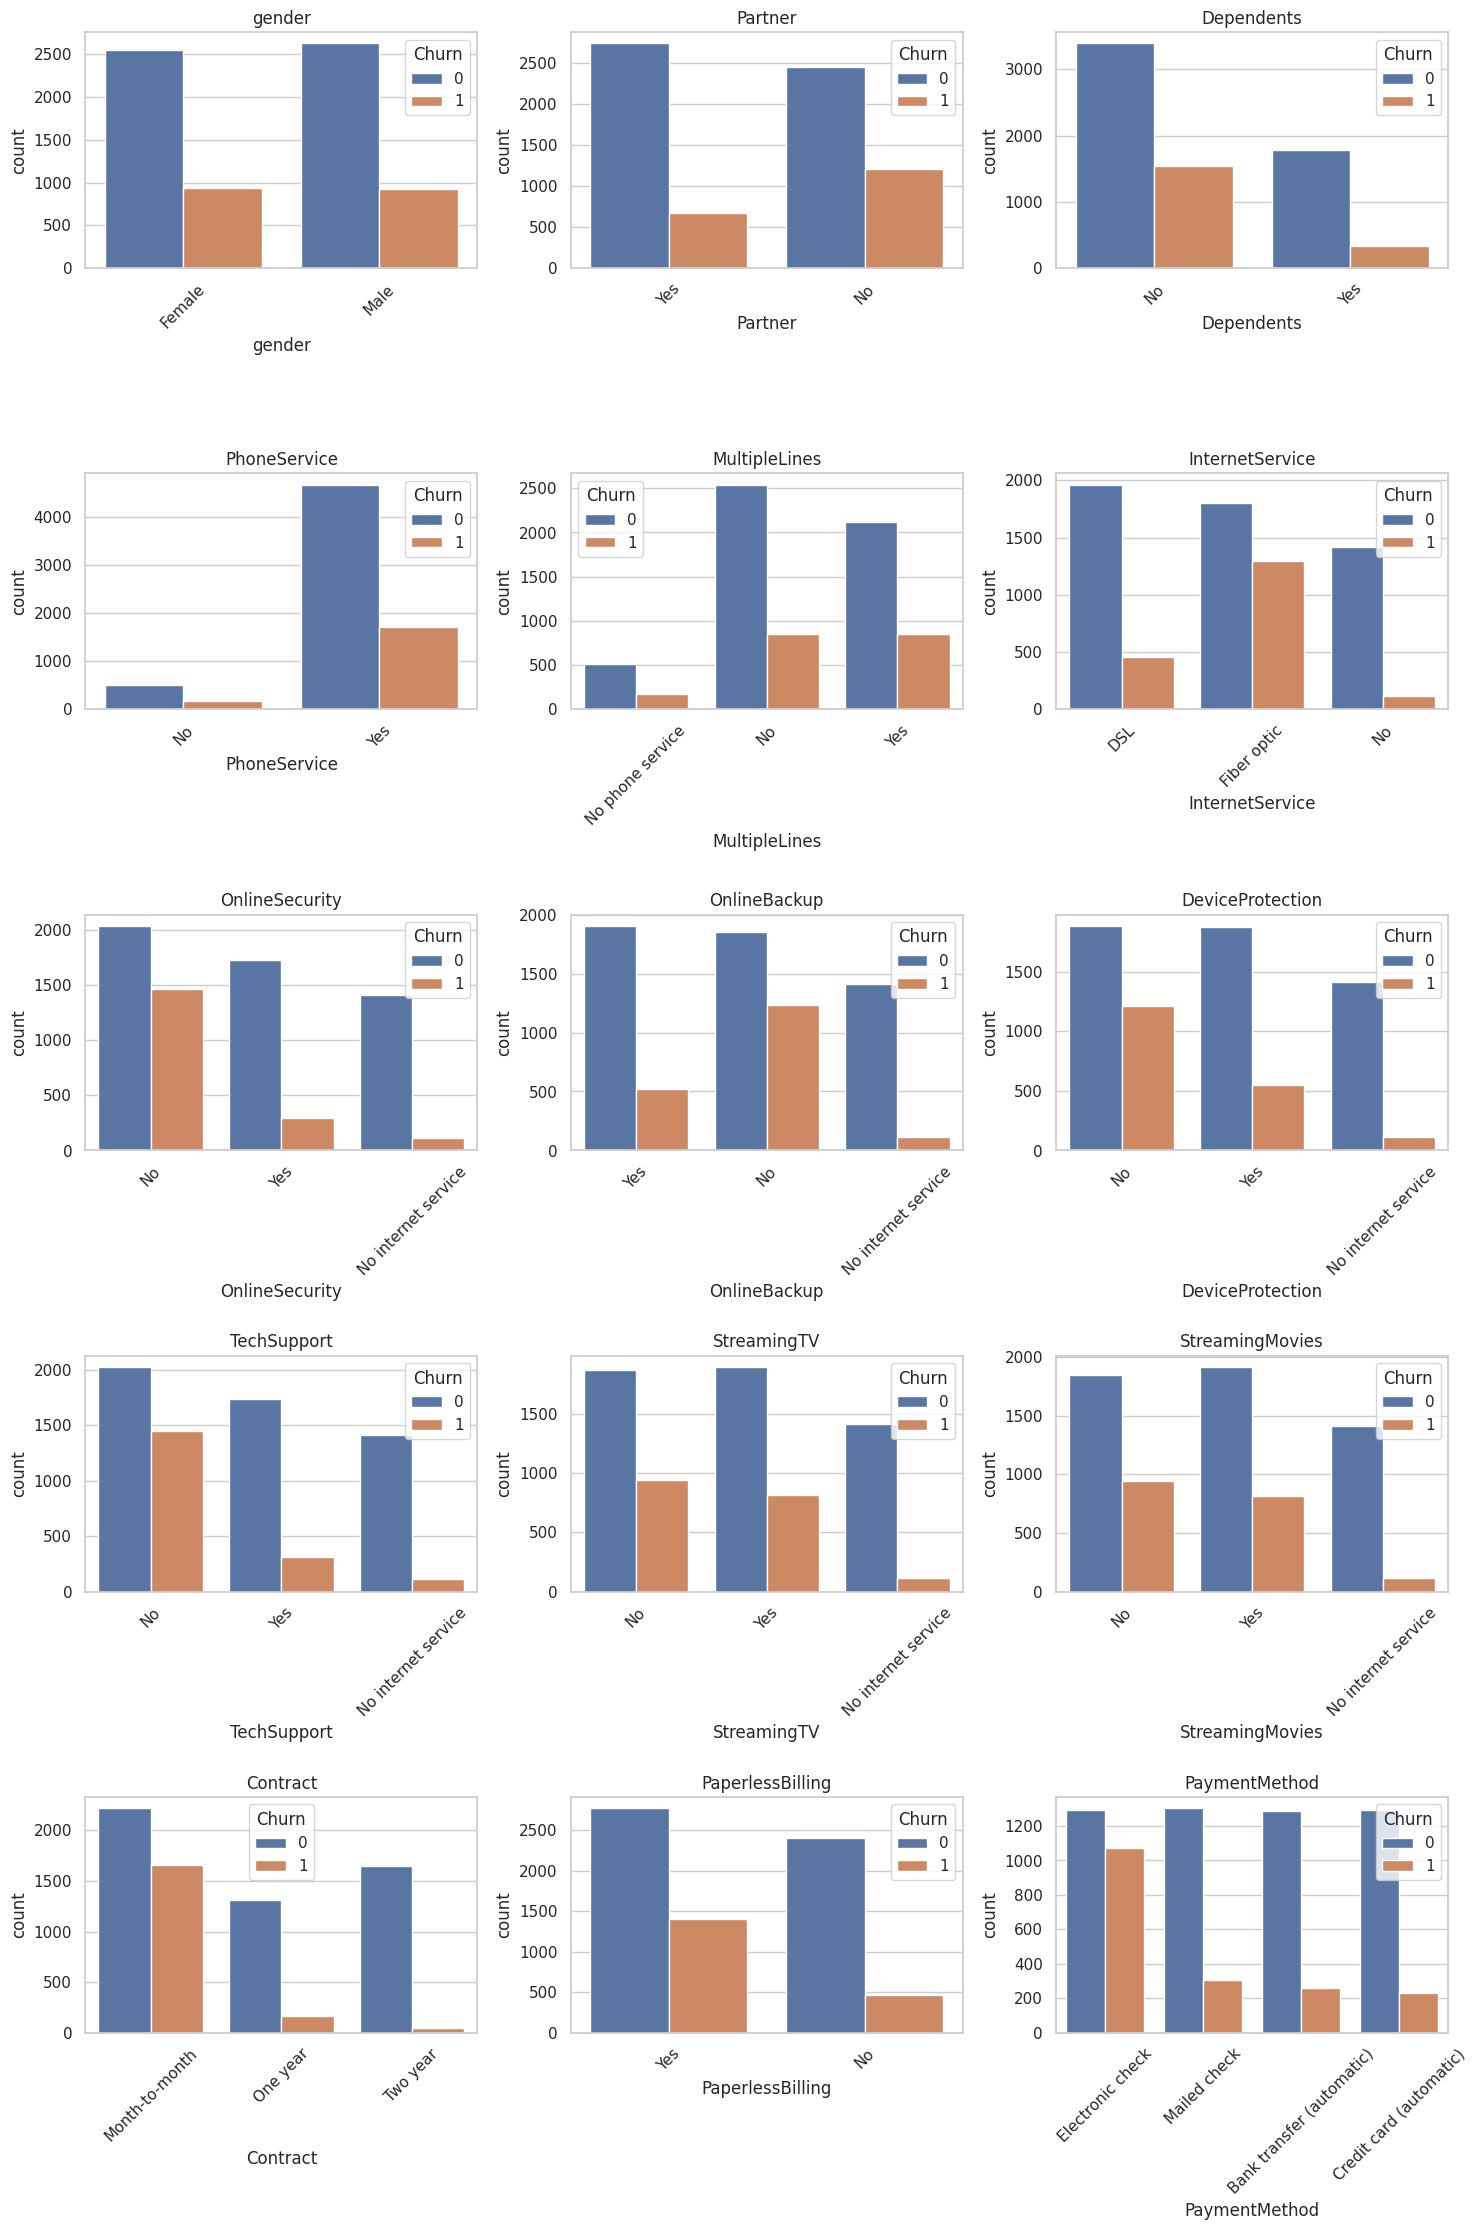

In [275]:


def plot_categorical_all(colum_cat):
    num_plots = len(colum_cat)
    num_rows = 6
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))
    plt.subplots_adjust(hspace=0.5)  # Ajustar el espacio vertical entre subplots

    for idx, column in enumerate(colum_cat):
        row = idx // num_cols
        col = idx % num_cols
        sns.countplot(data=df_data, x=column, hue='Churn', ax=axes[row, col])
        axes[row, col].set_title(column)
        axes[row, col].tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x

    # Ocultar subplots vacíos
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()  # Ajustar automáticamente los tamaños de los subplots
    plt.show()


colum_cat = df_data.select_dtypes(include='object').columns
plot_categorical_all(colum_cat)

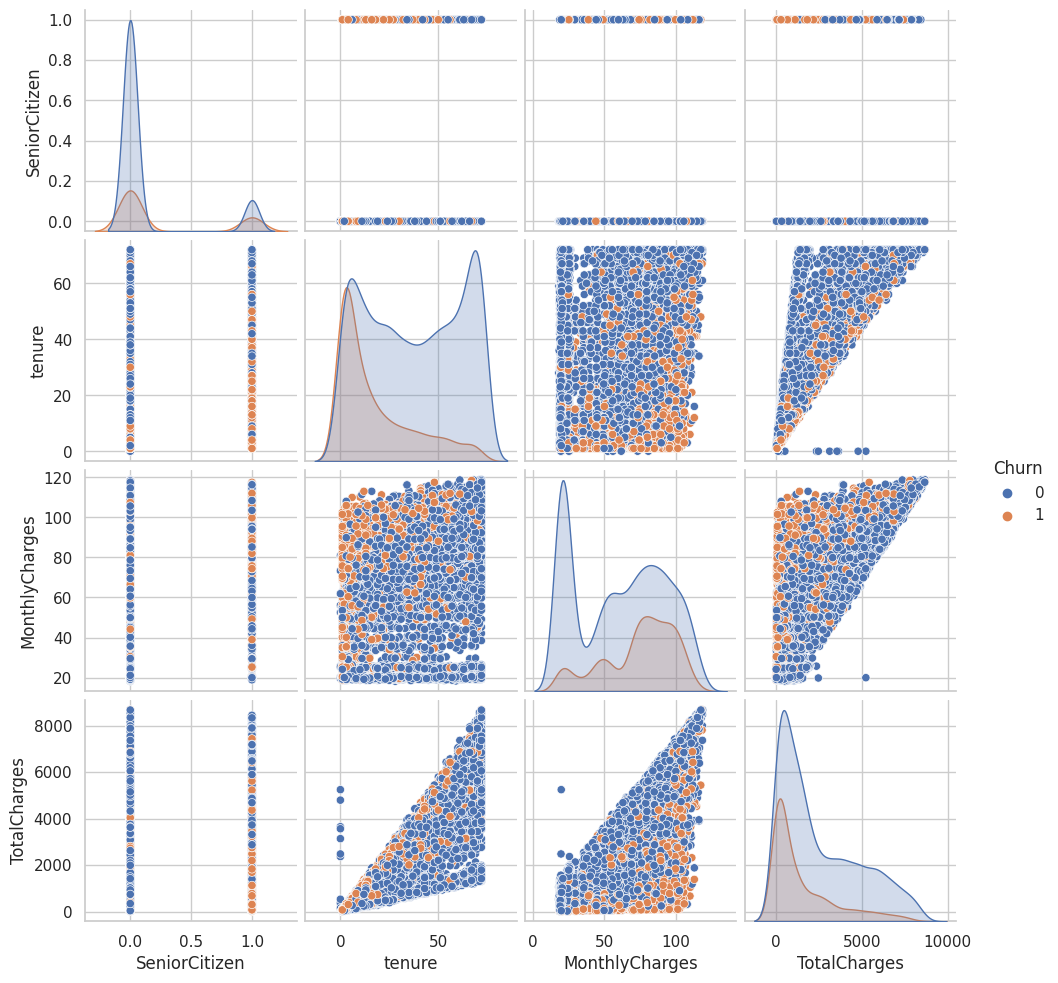

<Figure size 1000x1000 with 0 Axes>

In [276]:
sns.pairplot(data= df_data,hue='Churn')
fig = plt.figure(figsize=(10,10))
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [277]:
X = df_data_processing_scaled.drop("Churn",axis=1)
y = df_data_processing_scaled['Churn'].values

In [278]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.3, random_state=42) # entrenamos el modelo con 70% de los datos 

In [279]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train,y_train)


In [280]:
from sklearn import metrics # evaluacion del entrenamiento 
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.812588736393753


In [281]:
from sklearn.metrics import confusion_matrix # otra manera de obtener el accuracy 
cm_1 = confusion_matrix(y_test,prediction_test)
print(cm_1)
cm_1.diagonal().sum()/cm_1.sum()

[[1390  149]
 [ 247  327]]


0.812588736393753

## MLE("Maximum Likelihood Estimation)

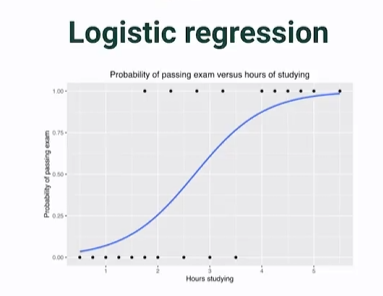

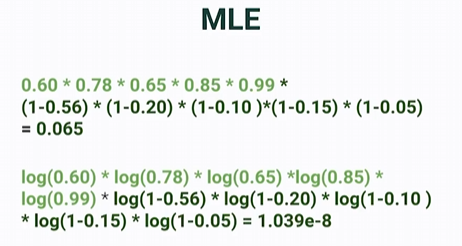

se hace una suma ponderada a todas las probabilidades con log. entre mas alto sea el resultado significa que la sinoidal esta mejor ubicada 

Gradient descent

se busca optimizar la funcion de costo
disminuye el rey de una funcion de costo(lo que le cuesta al algoritmo hacer una prediccion )

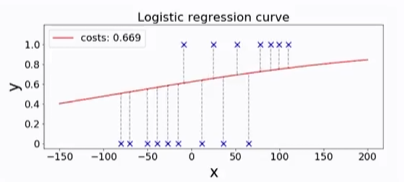


entre menor sea el costo mas alta la predicion y mejora el rendimiento 
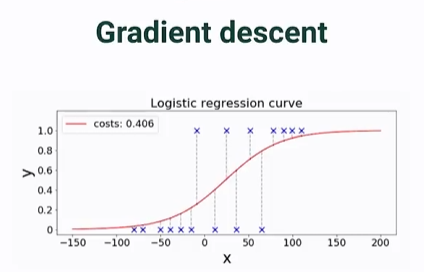

como lo logra 

la funcion de costo es una funcion matematica lo unico que se hace es hacer derivadas parciales para llegar al punto minimo 

## funcion de costo 

es la diferencia del resultado real de la prediccion y el que esta haciendo la prediccion del algoritmo(la regresion logistica)

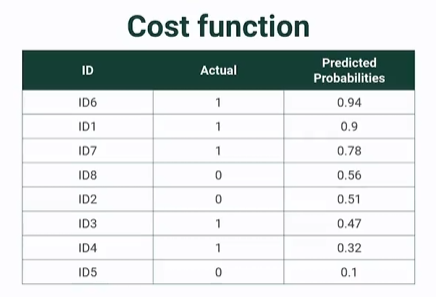

si el valor es 1 se toma la probabilidad pero si da 0 se le resta 1 y se aplica log 

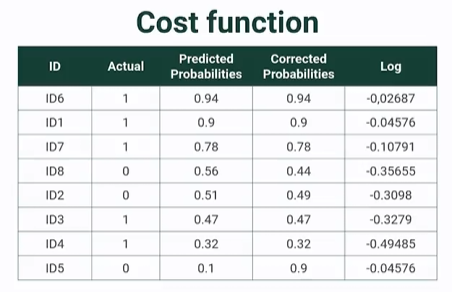

luego se pasa ala funcion de perdida 

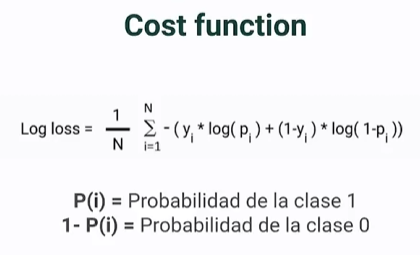

el modelo te da la probabilidad luego lo categoriza en 0 o 1 dependiendo del valor, luego se multiplica Actual class(si es 0 o 1) por el log de la probabilidad, despues se multiplica el otro caso(0 o 1) por el log de la resta de la probabilidad menos 1, como afuerzas un caso te tiene que dar 0 por que se multiplica por 0 se toma el valor que no es 0(que se ve en la ultima columna) luego a esos valores se les aplica un promedio para saber el costo 

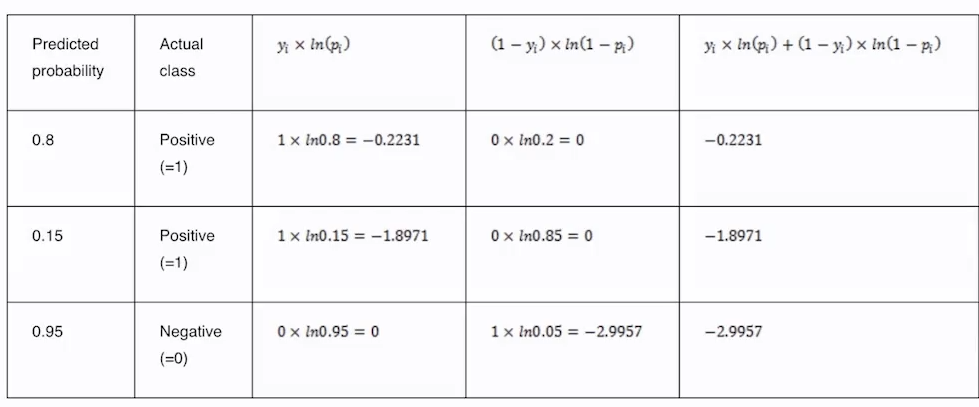

## Evaluación del modelo

Cuando se analiza la distribución de datos se observa que los valores NO representan el 73% de todos los datos lo cual hace que el balance sea muy desproporcionado

In [282]:
df_data_processing_scaled['Churn'].value_counts(normalize=True)*100

Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64

Luego de entrenar el modelo se obtiene un accuracy de 0.81 y unos valores de precision y recall muy bajos para la clase 1, sobretodo el F1 que tiene 0.62 algo que evidencia claramente que el modelo no esta correctamente entrenado

In [283]:
from sklearn.metrics import classification_report
predicciones = model.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1539
         1.0       0.69      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



Para solucionarlo he usado la libería imbalanced-learn  

 SMOTE crea muestras sintéticas para la clase minoritaria basándose en las características de las muestras existentes de esa misma clase. De esta manera, SMOTE aumenta la representación de la clase minoritaria en el conjunto de datos.(crea una muestra con base en otras muestras )

In [284]:
from imblearn.combine import SMOTEENN

# Crear una instancia de SMOTE
smote = SMOTEENN(sampling_strategy=0.99)

# Aplicar SMOTE para balancear los datos
X_bal, y_bal = smote.fit_resample(X, y)


# Convertir y_bal nuevamente a una Serie de pandas
y_bal_series = pd.Series(y_bal)

# Obtener el porcentaje de cada clase después del balanceo
(y_bal_series.value_counts() / len(y_bal_series)) * 100





Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f5c91ac4dc0>
Traceback (most recent call last):
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/roy/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

1.0    55.520765
0.0    44.479235
Name: count, dtype: float64

observa como ahora las clases quedan practicamente igual,con estos nuevos X_bal & y_bal podemos entrenar el modelo (reemplazamos X_bal & y_bal en la función train_test_split y lo demás continua como se estaba haciendo. Al evaluar los resultados se observa claramente como han mejorado lo resutados pasando de un accuracy de 0.81 a 0.95 (asismo e mejora precision,recall y F1 en la clase 1).

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X_bal,y_bal,test_size=0.3, random_state=42) 

In [286]:
from sklearn.linear_model import LogisticRegression
model_bal = LogisticRegression()
result = model_bal.fit(X_train,y_train)

In [287]:
from sklearn import metrics # evaluacion del entrenamiento 
prediction_test = model_bal.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test))

0.9115870400878638


In [288]:

predicciones = model_bal.predict(X_test).reshape(-1,1)
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       835
         1.0       0.90      0.94      0.92       986

    accuracy                           0.91      1821
   macro avg       0.91      0.91      0.91      1821
weighted avg       0.91      0.91      0.91      1821



Este “truco” se utliza en todos los problemas de clasificación binomial.

In [296]:
model_bal.predict_proba(X_test)# la probabilidad de que sea 0 

array([[0.38489401, 0.61510599],
       [0.00868696, 0.99131304],
       [0.04559254, 0.95440746],
       ...,
       [0.98262903, 0.01737097],
       [0.01778424, 0.98221576],
       [0.5751738 , 0.4248262 ]])

In [297]:
model_bal.coef_ # la importancia de los features para hacer la prediccion 
# RESULTADOS POSITIVOS NOS DICE LA IMPORTANCIA PARA PREDECIR 1, 
# RESULTADOS NEGATIVOS NOS DICE LA IMPORTANCIA PARA PREDECIR 0 

array([[ 0.23242488, -3.30806105,  0.15240315,  0.61970286, -0.16955559,
         0.1681258 ,  0.09498868, -0.09641847,  0.18463172, -0.18606152,
         0.2461338 , -0.24756359, -0.17914072,  0.2461338 , -0.06842287,
        -0.87189536,  1.1438174 , -0.27335183,  0.51197113, -0.27335183,
        -0.2400491 ,  0.45336166, -0.27335183, -0.18143963,  0.33258082,
        -0.27335183, -0.06065878,  0.31164499, -0.27335183, -0.03972295,
        -0.12393534, -0.27335183,  0.39585737, -0.28340211, -0.27335183,
         0.55532415,  1.60924855,  0.18795648, -1.79863482, -0.25631354,
         0.25488375, -0.20771995, -0.24928972,  0.46170974, -0.00612986]])

In [298]:
model_bal.feature_names_in_ # los nombres de las variables usadas para predecir la variable objetivo 

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

AxesSubplot(0.125,0.11;0.775x0.77)


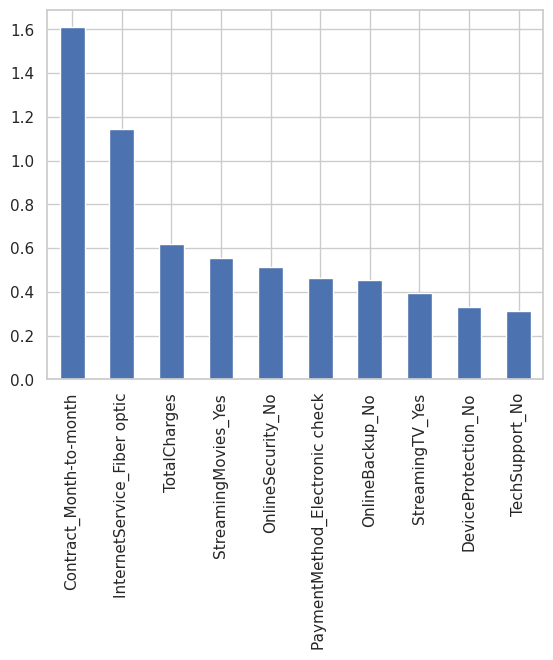

In [299]:

# asigna le nombre de la variable a cada valor del modelo arrojado del modelo en las anteriores lineas de codigo 
weights = pd.Series(model_bal.coef_[0], index=X.columns.values)

# Imprimimos los pesos ordenados de mayor a menor para las características
# Mantenemos solo los 10 mejores pesos (las 10 características más importantes)
# y graficamos estos 10 pesos en un gráfico de barras
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))


# esto nos da la prediccion positiva, 
# en este caso que es son las 10 causas mas importantes que afecta que alguien haga churn

AxesSubplot(0.125,0.11;0.775x0.77)


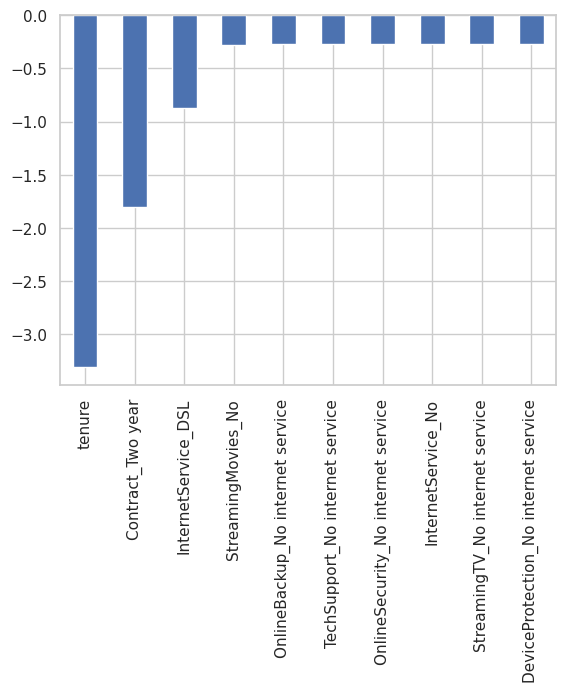

In [300]:
print(weights.sort_values(ascending=True)[:10].plot(kind='bar'))# ahora nos da las variables negativas cuando es 0 
# osea cuando no es churn, osea que hace que la gente no haga churn 

In [301]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

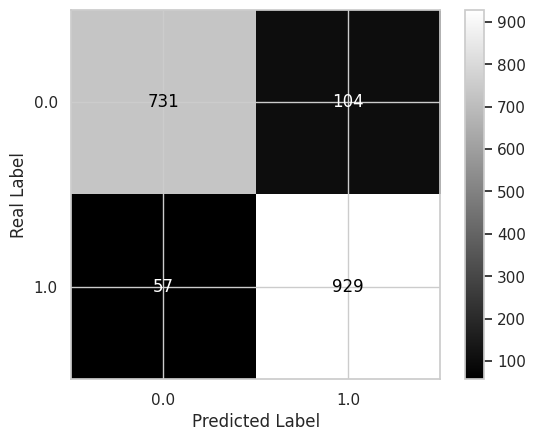

In [334]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test,prediction_test, labels=model_bal.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=model_bal.classes_)
disp.plot(cmap = 'gray')
plt.ylabel('Real Label')
plt.xlabel('Predicted Label')
plt.show()

# podemos ver el accuaracy de esta manera 

## Regularización

Esta técnica consiste en disminuir la complejidad de nuestro modelo a través de una penalización aplicada a sus variables más irrelevantes.

Para este ejemplo compararemos los resultados obtenidos con los distintos métodos de regularización usando la misma semilla y el mismo solver (saga)

## Tipos de regularización

### L1 Lasso

Reduce la complejidad a través de eliminación de features que no aportan demasiado al modelo.
Penaliza a los features que aporta poca información volviéndolos cero, eliminado el ruido que producen en el modelo.

C es un parámetro que define que tanto se penaliza a los features que menos aportan, debe ser siempre un valor positivo y mientras mas pequeño mayor sera la penalización

In [335]:
lasso=LogisticRegression(max_iter=10000, penalty='l1',solver='saga',C=0.5)
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

0.9115870400878638

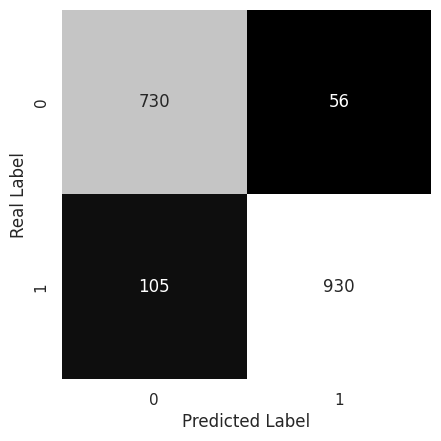

In [336]:
cm=confusion_matrix(lasso.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label')

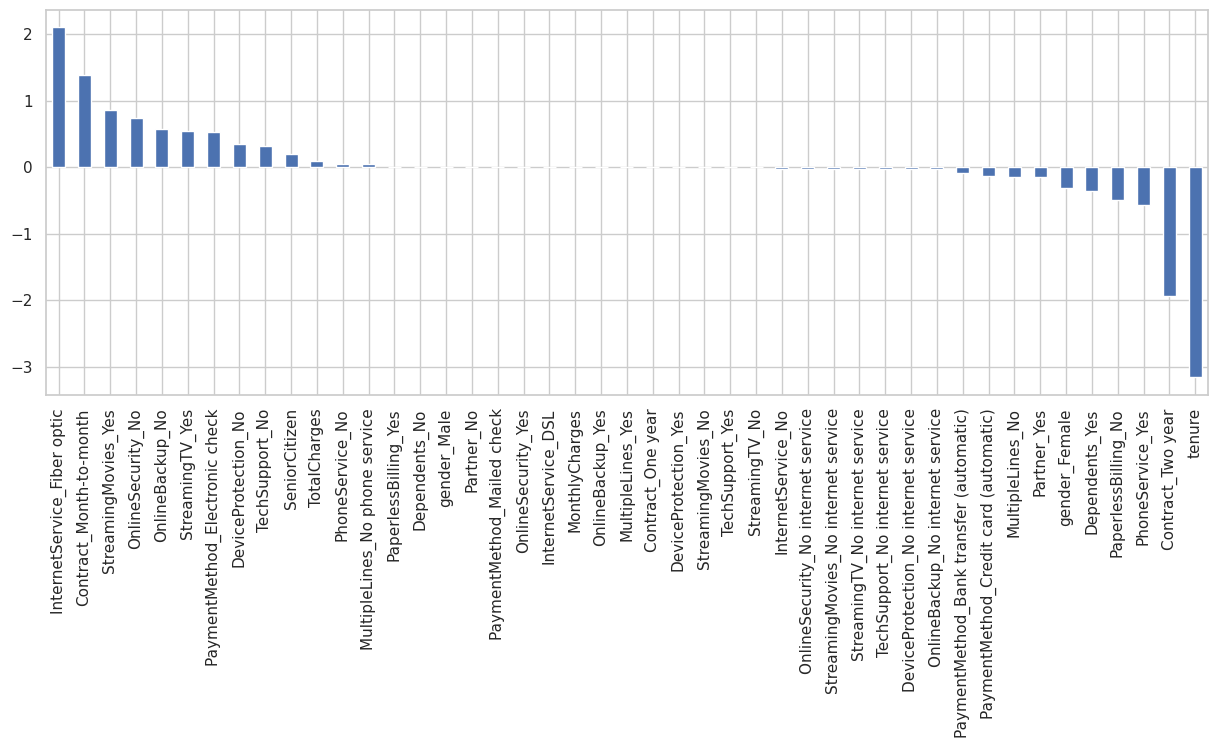

In [337]:
weights = pd.Series(lasso.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar')

Podemos ver cuales de nuestros parámetros se convirtieron a 0:

In [338]:
weights[weights==0]

OnlineSecurity_Yes      0.0
InternetService_DSL     0.0
MonthlyCharges          0.0
OnlineBackup_Yes        0.0
MultipleLines_Yes       0.0
Contract_One year       0.0
DeviceProtection_Yes    0.0
StreamingMovies_No      0.0
TechSupport_Yes         0.0
StreamingTV_No          0.0
dtype: float64

## L2 Ridge

Reduce la complejidad disminuyendo el impacto de ciertos features a nuestro modelo.
Penaliza los features poco relevantes, pero no los vuelve cero. Solamente limita la información que aportan a nuestro modelo.

In [339]:
ridge=LogisticRegression(max_iter=10000, penalty='l2',solver='saga',C=0.5)
ridge.fit(X_train, y_train)
ridge.score(X_test,y_test)

0.9110378912685337

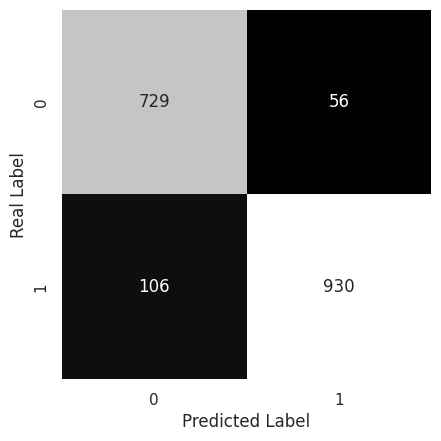

In [340]:
cm=confusion_matrix(ridge.predict(X_test),y_test)
sns.heatmap(
    cm,
    annot=True,
    cmap='gray',
    cbar=False,
    square=True,
    fmt="d"
    )
plt.ylabel('Real Label')
plt.xlabel('Predicted Label');

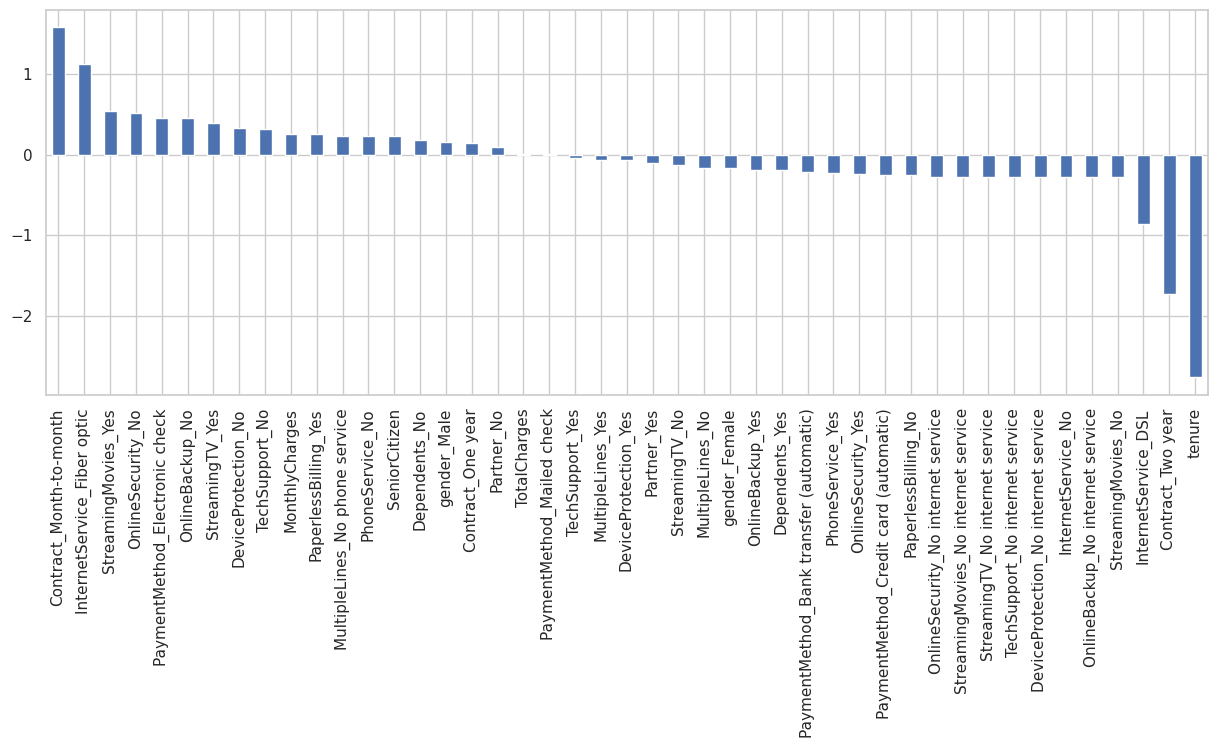

In [341]:
weights = pd.Series(ridge.coef_[0], index=X.columns.values).sort_values(ascending=False)
fig = plt.figure(figsize=(15,5))
weights.plot(kind='bar')

Ridge no convierte a los features que aportan poco en 0

## Lasso vs Ridge

1. No hay un campeón definitivo para todos los problemas.
2. Si hay pocos features que se relacionen directamente con la variable a predecir: Probar Lasso.
3. Si hay varios features relacionados con la variable a predecir: Probar Ridge.

Para aplicarlos y decidir cuál es el mejor en la práctica, podemos probar usando alguna técnica como cross-validation iterativamente. o bien, podemos combinarlos…

## ElasticNet: Una técnica intermedia:

Hasta el momento hemos podido ver dos técnicas de regularización en las cuales añadimos un componente de penalización en el proceso donde encontramos los valores de los parámetros 𝛽 minimizando la función de error.

Es común encontrarnos en la literatura con un camino intermedio llamado ElasticNet. Esta técnica consiste en combinar las dos penalizaciones anteriores en una sola función.

**Cuando usamos ElasticNet:**

1. Tenemos una forma de probar ambas L1 y L2 al tiempo sin perder información.
2. Supera las limitaciones individuales de ellas.
3. Si hace falta experiencia, o el conocimiento matemático de fondo, puede ser la opción preferente para probar la regularización.

Para implementar ElasticNet ahora vamos a usar l1_ratio el cual puede tomar valores entre 0 a 1. Si l1_ratio = 0 , ElasticNet se comportará como Ridge, y si l1_ratio = 1 , se comportará como Lasso. Por lo tanto, nos brinda todo el espectro lineal de posibles combinaciones entre estos dos extremos.

En este caso simplemente vamos a comparar el accuracy que obtenemos con distintos valores de l1_ratio:

In [342]:
val_c=np.arange(0,1,0.01)
acc=[]
for i in val_c:
    acc.append(LogisticRegression(max_iter=10000, penalty='elasticnet',solver='saga',l1_ratio=i).fit(X_train, y_train).score(X_test,y_test))

Ahora podemos crear una gráfica de  como se comportó nuestro accuracy on distintos valores de l1_ratio

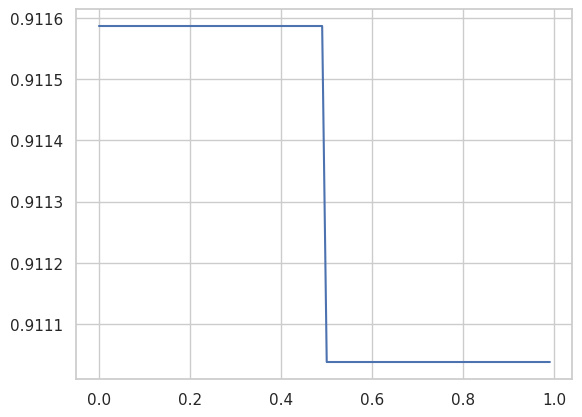

In [343]:
plt.plot(val_c,acc)

Igualmente recordemos que se calculó el accuracy con una sola iteración y que para realmente comparar estos valores debemos usar mejores estrategias de validación como Cross-validation